# Análisis estadístico de diversidad alfa en comunidades microbianas del suelo sometido a diferentes condiciones y tratamientos

## Introducción
Este script fue creado para el análisis estadístico de parámetros de diversidad alfa en comunidades microbianas del suelo, con el objetivo de evaluar el impacto de diferentes tratamientos y condiciones experimentales sobre la estructura de estas comunidades. Los datos analizados corresponden a medidas del número de secuencias, OTUs observadas y riqueza, las cuales se obtuvieron a partir de muestras de suelo cultivadas bajo diferentes combinaciones de tratamientos experimentales.

Las condiciones experimentales incluyeron dos factores principales: la presencia o ausencia de plantas de trigo y distintos manejos del suelo representados por diferentes claves (CTB, CTB-N, PBB, PBB-N, PBR, y PBR-N), donde **CTB:** parcela con labranza convencional, camas labradas después de cada cosecha con rastra de disco a profundidad de 20 cm, residuos de maíz y trigo son incorporados mediante la operación de labranza, los cultivos no son fertilizados. **CTB-N:** igual a CTB pero los cultivos son fertilizados con 300 kg de nitrógeno por hectárea. **PBB:** camas elevadas permanentes, sin labranza y continuo reúso de las camas, los surcos se reforman sin perturbar las camas, los residuos del maíz y trigo son quemados y no se aplica fertilizante. **PBB-N:** igual a PBB pero los cultivos son fertilizados con 300 kg de nitrógeno por hectárea. **PBR:** camas elevadas permanentes, sin labranza y continuo reúso de las camas, los surcos se reforman sin perturbar las camas, los residuos del maíz y trigo se dejan sobre la superficie del suelo y no se aplica fertilizante. **PBR-N:** igual a PBR pero los cultivos son fertilizados con 300 kg de nitrógeno por hectárea.



## El script
Este script fue hecho para el análisis de datos. Estos datos son proporcionados en un archivo Excel (.xlsx), donde se tienen diferentes medidas del No. de Secuencias encontradas, las OTUs observadas y la riqueza en base a los tratamientos aplicados (con o sin plantas de trigo) y a las condiciones del suelo (CTB, CTB-N, PBB, PBB-N, PBR, y PBR-N). Cada tratamiento tiene múltiples datos tomados en diferentes momentos del estudio. 

## Ambiente conda
Este script debe ejecutarse con el entorno conda `ambiente_proyecto_zeballos.yaml` proporcionado en este repositorio de GitHub. El nombre del entorno es `proyecto_final`. Puede ejecutar: `conda create --name proyecto_final --file ambiente_proyecto_zeballos.yaml` en la terminal y luego activar `proyecto_final`. El directorio con los archivos utilizados en este proyecto, tiene el nombre de **proyecto_diversidad_microbiana**.

##  Importar los paquetes y los datos:
Para correr todo el script debe utilizarse VSCode con el kernel `proyecto_final (Python 3.12.8)`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, f_oneway, kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Cargar los datos:
Esta base de datos pertenece a un estudio mucho más amplio realizado por Romero (2016)
> Romero, C., & Amin, Y. (2016). Dinámica de poblaciones bacterianas durante la descomposición de materia orgánica en suelo sometido a diferentes prácticas agrícolas. [Enlace](https://repositorio.cinvestav.mx/handle/cinvestav/1339)

La base de datos se encuentra en formato Excel con el nombre **Datos_proyecto.xlsx**. Si es que hay un error al cargar la base de datos de Excel, también se adjunta la base de datos en formato .csv

In [8]:
#Base de datos en formato .csv
datos = pd.read_csv('/home/majuroki/proyecto_diversidad_microbiana/Datos_proyecto.csv', sep = ";")
datos.head()

,Clave,Tratamiento,No. De Secuencias,OTUs observadas,Riqueza
0,CTB,Suelo sin plantas de trigo,3463,523,14831.7
1,NaN,NaN,3454,567,26282.0
2,NaN,NaN,4569,550,16540.7
3,NaN,NaN,14720,559,13691.1
4,NaN,NaN,9894,538,7834.0


In [7]:
#Base de datos en formato .xlsx (mejor importar solo un formato)
datos = pd.read_excel("/home/majuroki/proyecto_diversidad_microbiana/Datos_proyecto.xlsx")
datos.head()

,Clave,Tratamiento,No. De Secuencias,OTUs observadas,Riqueza
0,CTB,Suelo sin plantas de trigo,3463,523,14831.7
1,NaN,NaN,3454,567,26282.0
2,NaN,NaN,4569,550,16540.7
3,NaN,NaN,14720,559,13691.1
4,NaN,NaN,9894,538,7834.0


Con los datos importados, podemos ver que hay celdas unidas ya que, por ejemplo, la condición del suelo CTB tiene los dos tratamientos (con o sin plantas de trigo), y, a su vez, cada tratamiento tiene varias mediciones de los tres parámetros de diversidad alfa (No. De Secuencias, OTUs observadas y Riqueza). Lo mismo para las otras condiciones. Es por eso que para evitar las celdas unidas que se consideran como vacías, utilizamos la función `datos.fillna(method="ffill")` para rellenar los valores de NaN con el último valor válido de la misma columna.

Al mismo tiempo, para trabajar de forma más sencilla y evitar las confuciones en comandos que no permitan el uso de "Espacios", cambiamos los nombres de las columnas. Cambiamos "No. De Secuencias" a "Secuencias" y "OTUs observadas" a "OTUs"

In [9]:
#Rellenar los valores de NaN con el último valor válido de la misma columna
datos = datos.fillna(method="ffill")

#Cambiar nombres de las columnas
datos.rename(columns={'No. De Secuencias': 'Secuencias', 'OTUs observadas': 'OTUs'}, inplace=True)
print(datos.head(20))

/tmp/ipykernel_46816/1759917690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datos = datos.fillna(method="ffill")


       Clave                 Tratamiento  Secuencias  OTUs  Riqueza
0        CTB  Suelo sin plantas de trigo        3463   523  14831.7
1        CTB  Suelo sin plantas de trigo        3454   567  26282.0
2        CTB  Suelo sin plantas de trigo        4569   550  16540.7
3        CTB  Suelo sin plantas de trigo       14720   559  13691.1
4        CTB  Suelo sin plantas de trigo        9894   538   7834.0
5        CTB  Suelo sin plantas de trigo        3923   558   7208.3
6        CTB  Suelo sin plantas de trigo        4986   521   8255.6
7        CTB  Suelo con plantas de trigo        6295   544  14246.6
8        CTB  Suelo con plantas de trigo        1215   598  11869.4
9        CTB  Suelo con plantas de trigo        8875   558  12685.5
10       CTB  Suelo con plantas de trigo        7270   547   9078.4
11       CTB  Suelo con plantas de trigo        4073   556   7231.5
12       CTB  Suelo con plantas de trigo        3137   555   8402.0
13  CTB - N   Suelo sin plantas de trigo        

In [10]:
#Saber la información de los datos, la cantidad y su tipo
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Clave        75 non-null     object 
 1   Tratamiento  75 non-null     object 
 2   Secuencias   75 non-null     int64  
 3   OTUs         75 non-null     int64  
 4   Riqueza      75 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.1+ KB


Si queremos visualizar mucho mejor la tabla de datos, usamos la extención DataWrangler para evitar usar el comando `print()`

In [11]:
datos.head()

,Clave,Tratamiento,Secuencias,OTUs,Riqueza
0,CTB,Suelo sin plantas de trigo,3463,523,14831.7
1,CTB,Suelo sin plantas de trigo,3454,567,26282.0
2,CTB,Suelo sin plantas de trigo,4569,550,16540.7
3,CTB,Suelo sin plantas de trigo,14720,559,13691.1
4,CTB,Suelo sin plantas de trigo,9894,538,7834.0


Debido a que tenemos varias condiciones, cada una con dos tratamientos, realizamos el análisis estadístico descriptivo agrupando los datos de estas calves con el tratamiento aplicado:

In [12]:
#Análisis estadístico descriptivo de los datos agrupándolos según su condición (clave) y el tratamiento utilizado.
agrupados = datos.groupby(["Clave", "Tratamiento"]).describe()
agrupados

Secuencias                            \
                                         count         mean          std   
Clave    Tratamiento                                                       
CTB      Suelo con plantas de trigo        6.0  5144.166667  2841.730770   
         Suelo sin plantas de trigo        7.0  6429.857143  4285.957047   
CTB - N  Suelo con plantas de trigo        6.0  5694.000000  1806.988212   
         Suelo sin plantas de trigo        7.0  5231.285714  2496.308589   
PBB      Suelo con plantas de trigo        6.0  6724.833333  1947.358767   
         Suelo sin plantas de trigo        6.0  6647.500000  3696.389198   
PBB - N  Suelo con plantas de trigo        6.0  7997.500000  3169.147756   
         Suelo sin plantas de trigo        6.0  5662.000000  3212.552630   
PBR      Suelo con plantas de trigo        6.0  3737.833333   903.316869   
         Suelo sin plantas de trigo        7.0  5685.571429  3269.352120   
PBR - N  Suelo con plantas de trigo        6.0  7975.500000  3071.572350   
         Suelo sin plantas de trigo        6.0  6368.166667  2354.616692   

                                                                        \
                                        min      25%     50%       75%   
Clave    Tratamiento                                                     
CTB      Suelo con plantas de trigo  1215.0  3371.00  5184.0   7026.25   
         Suelo sin plantas de trigo  3454.0  3693.00  4569.0   7440.00   
CTB - N  Suelo con plantas de trigo  3735.0  4309.25  5432.0   6750.50   
         Suelo sin plantas de trigo  3104.0  3729.50  4635.0   5489.50   
PBB      Suelo con plantas de trigo  4912.0  5316.00  6024.5   7905.25   
         Suelo sin plantas de trigo  1168.0  4604.00  6985.5   8941.00   
PBB - N  Suelo con plantas de trigo  3988.0  5484.00  8258.0  10522.75   
         Suelo sin plantas de trigo   616.0  4049.75  6255.0   8263.00   
PBR      Suelo con plantas de trigo  2794.0  3031.75  3676.0   4156.75   
         Suelo sin plantas de trigo  2975.0  3378.00  3895.0   7337.50   
PBR - N  Suelo con plantas de trigo  5836.0  5865.75  6803.0   8558.50   
         Suelo sin plantas de trigo  2468.0  5249.25  7079.5   7859.00   

                                              OTUs              ...          \
                                         max count        mean  ...     75%   
Clave    Tratamiento                                            ...           
CTB      Suelo con plantas de trigo   8875.0   6.0  559.666667  ...  557.50   
         Suelo sin plantas de trigo  14720.0   7.0  545.142857  ...  558.50   
CTB - N  Suelo con plantas de trigo   8440.0   6.0  545.666667  ...  563.00   
         Suelo sin plantas de trigo  10442.0   7.0  529.714286  ...  540.00   
PBB      Suelo con plantas de trigo   9776.0   6.0  546.000000  ...  549.50   
         Suelo sin plantas de trigo  11343.0   6.0  554.000000  ...  573.25   
PBB - N  Suelo con plantas de trigo  11644.0   6.0  555.666667  ...  565.75   
         Suelo sin plantas de trigo   8599.0   6.0  547.333333  ...  569.75   
PBR      Suelo con plantas de trigo   5147.0   6.0  548.833333  ...  552.75   
         Suelo sin plantas de trigo  11498.0   7.0  525.428571  ...  531.00   
PBR - N  Suelo con plantas de trigo  13714.0   6.0  528.000000  ...  557.50   
         Suelo sin plantas de trigo   8824.0   6.0  555.000000  ...  569.25   

                                           Riqueza                             \
                                       max   count          mean          std   
Clave    Tratamiento                                                            
CTB      Suelo con plantas de trigo  598.0     6.0  10585.566667  2747.740565   
         Suelo sin plantas de trigo  567.0     7.0  13520.485714  6753.087728   
CTB - N  Suelo con plantas de trigo  577.0     6.0   7442.016667  4586.874151   
         Suelo sin plantas de trigo  603.0     7.0   7521.514286  6716.356527   
PBB      Suelo con plantas de t

## Análisis de Datos
### Prueba de normalidad de los datos
Aplicamos la prueba de Shapiro-Wilk, que evalúa si el conjunto de datos sigue una distribución normal. W mide qué tan bien los datos se ajustan a una distribución normal. W cercano a 1 indica que los datos tienen una forma más cercana a la normalidad, mientras que valores más bajos indican mayores desviaciones de la normalidad. Además si p > 0.05, los datos son normales; si p ≤ 0.05, no lo son.

Las gráficas de los boxplot ayudan a visualizar mejor esta distribución normal o no normal de los datos, ya que los datos normales tienen una caja simétrica y bigotes equilibrados alrededor de la mediana, mientras que los datos no normales tienen asimetría, bigotes desiguales o presencia de muchos valores atípicos.

In [14]:
#Prueba de Shapiro-Wilk para ver la distribución de los datos, en este caso de las Secuencias.
for (clave, tratamiento), group in datos.groupby(["Clave", "Tratamiento"]):
    stat, p = stats.shapiro(group["Secuencias"])
    print(f"{clave} - {tratamiento}: W = {stat}, p = {p}")

CTB - Suelo con plantas de trigo: W = 0.9771984019873209, p = 0.936814418060194
CTB - Suelo sin plantas de trigo: W = 0.754423905259711, p = 0.014109320551234778
CTB - N  - Suelo con plantas de trigo: W = 0.9475024179316878, p = 0.7200180521699201
CTB - N  - Suelo sin plantas de trigo: W = 0.8005748570069543, p = 0.041503988600307885
PBB - Suelo con plantas de trigo: W = 0.8829423916768222, p = 0.28284327624434813
PBB - Suelo sin plantas de trigo: W = 0.9754454725917319, p = 0.9268091974885657
PBB - N - Suelo con plantas de trigo: W = 0.9189976876368621, p = 0.498171405146599
PBB - N - Suelo sin plantas de trigo: W = 0.8673975249626749, p = 0.2160269650186578
PBR - Suelo con plantas de trigo: W = 0.9121029636146639, p = 0.45037532805161046
PBR - Suelo sin plantas de trigo: W = 0.8349553314725746, p = 0.08912027145008056
PBR - N - Suelo con plantas de trigo: W = 0.7793550530744259, p = 0.03801565295897226
PBR - N - Suelo sin plantas de trigo: W = 0.9225217409727998, p = 0.52370614054641

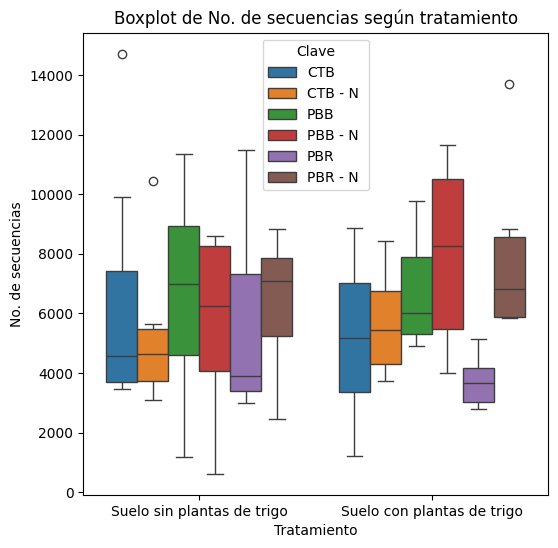

In [15]:
#Figura boxplot para visualizar la distribución de los datos de las Secuencias
plt.figure(figsize=(6,6))
sns.boxplot(x="Tratamiento", y="Secuencias", hue="Clave", data=datos)

plt.title("Boxplot de No. de secuencias según tratamiento")

plt.xlabel("Tratamiento")
plt.ylabel("No. de secuencias")
plt.xticks(rotation=0)
plt.show()

In [16]:
#Prueba de Shapiro-Wilk para ver la distribución de los datos, en este caso de las OTUs.
for (clave, tratamiento), group in datos.groupby(["Clave", "Tratamiento"]):
    stat, p = stats.shapiro(group["OTUs"])
    print(f"{clave} - {tratamiento}: W = {stat}, p = {p}")

CTB - Suelo con plantas de trigo: W = 0.7505997169323105, p = 0.020191217307264676
CTB - Suelo sin plantas de trigo: W = 0.9064031719404241, p = 0.37153085746041786
CTB - N  - Suelo con plantas de trigo: W = 0.952647164012185, p = 0.7616557186746405
CTB - N  - Suelo sin plantas de trigo: W = 0.9445225170992304, p = 0.6797299276702682
PBB - Suelo con plantas de trigo: W = 0.9075574387861348, p = 0.4205231267017017
PBB - Suelo sin plantas de trigo: W = 0.8549620818735748, p = 0.17254059443999897
PBB - N - Suelo con plantas de trigo: W = 0.9158396728285099, p = 0.47591295141243817
PBB - N - Suelo sin plantas de trigo: W = 0.9267821253069165, p = 0.5554909693131923
PBR - Suelo con plantas de trigo: W = 0.9075687799797508, p = 0.4205959184094106
PBR - Suelo sin plantas de trigo: W = 0.8859455422454711, p = 0.2541745678977341
PBR - N - Suelo con plantas de trigo: W = 0.9157471649940577, p = 0.4752701316850304
PBR - N - Suelo sin plantas de trigo: W = 0.8631010826199192, p = 0.200061711431588

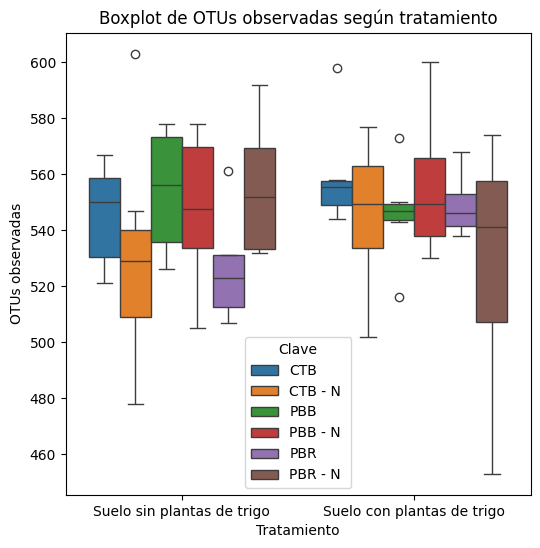

In [17]:
#Figura boxplot para visualizar la distribución de los datos de las OTUs
plt.figure(figsize=(6,6))
sns.boxplot(x="Tratamiento", y="OTUs", hue="Clave", data=datos)

plt.title("Boxplot de OTUs observadas según tratamiento")

plt.xlabel("Tratamiento")
plt.ylabel("OTUs observadas")
plt.xticks(rotation=0)
plt.show()

In [18]:
#Prueba de Shapiro-Wilk para ver la distribución de los datos, en este caso de la Riqueza.

for (clave, tratamiento), group in datos.groupby(["Clave", "Tratamiento"]):
    stat, p = stats.shapiro(group["Riqueza"])
    print(f"{clave} - {tratamiento}: W = {stat}, p = {p}")

CTB - Suelo con plantas de trigo: W = 0.9407236293043917, p = 0.6650350036916868
CTB - Suelo sin plantas de trigo: W = 0.8725194274576769, p = 0.19525909242422934
CTB - N  - Suelo con plantas de trigo: W = 0.8507718662419838, p = 0.15968199517802373
CTB - N  - Suelo sin plantas de trigo: W = 0.6119956591642943, p = 0.00037615095357071844
PBB - Suelo con plantas de trigo: W = 0.8624198615878238, p = 0.19762388567051098
PBB - Suelo sin plantas de trigo: W = 0.8660107667245758, p = 0.2107612613564407
PBB - N - Suelo con plantas de trigo: W = 0.8737792773314481, p = 0.2416894728869945
PBB - N - Suelo sin plantas de trigo: W = 0.881766293350672, p = 0.2772668491075364
PBR - Suelo con plantas de trigo: W = 0.9982152313581523, p = 0.9998171432064265
PBR - Suelo sin plantas de trigo: W = 0.7950857115875194, p = 0.03661341834919277
PBR - N - Suelo con plantas de trigo: W = 0.941024390120246, p = 0.6674636334576474
PBR - N - Suelo sin plantas de trigo: W = 0.9193729898725709, p = 0.5008565082500

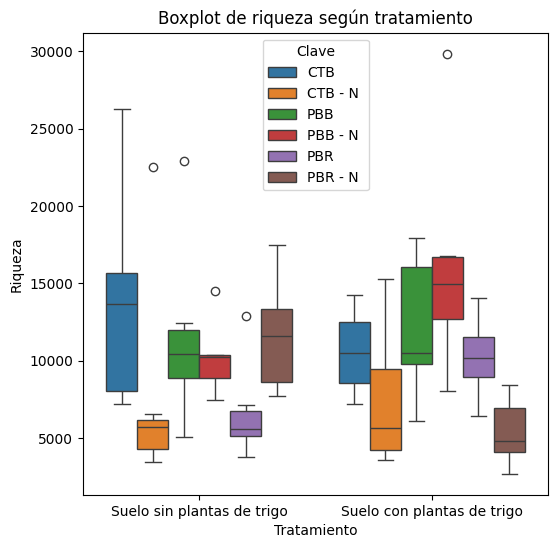

In [19]:
#Figura boxplot para visualizar la distribución de los datos de la Riqueza
plt.figure(figsize=(6,6))
sns.boxplot(x="Tratamiento", y="Riqueza", hue="Clave", data=datos)

plt.title("Boxplot de riqueza según tratamiento")

plt.xlabel("Tratamiento")
plt.ylabel("Riqueza")
plt.xticks(rotation=0)
plt.show()

Por lo general se observa una distribución normal de los datos, con algunos valores atípicos. La riqueza parece mostrar que no hay una distribución normal de los datos, sin embargo al analizar los datos de la prueba de Shapiro, vemos que la mayoría de los conjuntos de datos tienen una distribución nomal, exceptuando **CTB-N - Suelo sin plantas de trigo (p = 0.0004)** y **PBR - Suelo sin plantas de trigo (p = 0.0366)**.

### Análisis de Varianza
Aplicamos el análisis de ANOVA que se realiza para comparar las medias de más de dos grupos y determinar si existen diferencias significativas entre ellas. Sin embargo, el resultado nos dice si al menos un grupo difiere significativamente de los demás, pero no especifican cuál, por lo que, si se encuentra diferencias significativas, se realizan pruebas post hoc.

Para la interpretación de los resultados es importante saber que F nos indica la relación entre la variabilidad entre grupos y dentro de los grupos. Un F más alto sugiere diferencias significativas entre las medias. Ademas, si p ≤ 0.05, hay diferencias significativas entre las medias.

In [20]:
#ANOVA de dos vías que explica el impacto de la Clave y el Tratamiento sobre las Secuencias.
ANOVA_S = ols('Secuencias ~ C(Clave) + C(Tratamiento) + C(Clave):C(Tratamiento)', data=datos).fit()
ANOVA_tabla= sm.stats.anova_lm(ANOVA_S, typ=2)
ANOVA_tabla

,sum_sq,df,F,PR(>F)
C(Clave),5.277204e+07,5.0,1.239352,0.301483
C(Tratamiento),5.170920e+05,1.0,0.060720,0.806163
C(Clave):C(Tratamiento),4.190379e+07,5.0,0.984111,0.434594
Residual,5.365123e+08,63.0,NaN,NaN


In [21]:
#ANOVA de dos vías que explica el impacto de la Clave y el Tratamiento sobre las OTUs
ANOVA_O = ols('OTUs ~ C(Clave) + C(Tratamiento) + C(Clave):C(Tratamiento)', data=datos).fit()
ANOVA_tabla_2= sm.stats.anova_lm(ANOVA_O, typ=2)
ANOVA_tabla_2

,sum_sq,df,F,PR(>F)
C(Clave),3322.095046,5.0,0.939073,0.462049
C(Tratamiento),473.481798,1.0,0.669207,0.416412
C(Clave):C(Tratamiento),5387.274612,5.0,1.522848,0.195476
Residual,44574.166667,63.0,NaN,NaN


In [22]:
#ANOVA de dos vías que explica el impacto de la Clave y el Tratamiento sobre la Riqueza
ANOVA_R = ols('Riqueza ~ C(Clave) + C(Tratamiento) + C(Clave):C(Tratamiento)', data=datos).fit()
ANOVA_tabla_3= sm.stats.anova_lm(ANOVA_R, typ=2)
ANOVA_tabla_3

,sum_sq,df,F,PR(>F)
C(Clave),3.695574e+08,5.0,3.162015,0.013083
C(Tratamiento),3.307137e+05,1.0,0.014148,0.905696
C(Clave):C(Tratamiento),2.959050e+08,5.0,2.531828,0.037582
Residual,1.472613e+09,63.0,NaN,NaN


### Análisis post-hoc
Ni las Secuencias, ni las OTUs pareces ser afectadas por las condiciones del suelo (Clave) o por los Tratamientos, ya que en ambos los resultados de la ANOVA muestran un valor de p > 0.05 y un valor muy bajo de F. Sin embargo, la Riqueza si parece ser afectada por la Clave y por el conjunto Clave:Tratamiento, ya que muestra un valor de p < 0.05, aunque el valor de F sigue siendo un poco bajo.

Realizamos el análisis post-hoc para la Riqueza con la prueba de Tukey. Esta prueba compara todas las posibles parejas de medias entre grupos, por lo que te dice qué grupos específicos tienen diferencias significativas en sus medias, ayudando a identificar dónde están las diferencias después de encontrar un resultado significativo en la ANOVA. Si p > 0.05, no hay una diferencia significativa entre las medias de esos dos grupos. Además, en la columna "reject", **True** significa que hay una diferencia significativa entre los dos grupos, y **False** significa que no hay una diferencia significativa entre los dos grupos.

In [23]:
tukey = pairwise_tukeyhsd(endog=datos['Riqueza'],       # Variable dependiente (Riqueza)
                          groups=datos['Clave'],       # Grupos que queremos analizar por parejas (Clave)
                          alpha=0.05)              # Aclaramos el nivel de significancia (p)

print(tukey)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------
     CTB CTB - N  -4681.0846 0.1861 -10502.4823  1140.3131  False
     CTB      PBB  -309.6244    1.0  -6251.0635  5631.8148  False
     CTB  PBB - N  1033.9506 0.9956  -4907.4885  6975.3898  False
     CTB      PBR -3905.3923 0.3719    -9726.79  1916.0054  False
     CTB  PBR - N  -3652.416 0.4713  -9593.8552  2289.0231  False
CTB - N       PBB  4371.4603 0.2714  -1569.9789 10312.8994  False
CTB - N   PBB - N  5715.0353 0.0662   -226.4039 11656.4744  False
CTB - N       PBR   775.6923 0.9988  -5045.7054    6597.09  False
CTB - N   PBR - N  1028.6686 0.9957  -4912.7705  6970.1077  False
     PBB  PBB - N   1343.575 0.9866  -4715.5278  7402.6778  False
     PBB      PBR -3595.7679  0.489  -9537.2071  2345.6712  False
     PBB  PBR - N -3342.7917 0.5902  -9401.8945  2716.3112  False
 PBB - N  

Viendo que no hay diferencias significativas, realizamos las gráficas para estar más seguros. Primero realizamos la gráfica resaltando la Clave CTB, que da las líneas punteadas de referencia para marcar "sin diferencias significativas". Cada línea horizontal ploma que se extiende de cada punto, es un intérvalo de confianza. Si estos intérvalos de confianza tocan la línea punteada, significa que no hay diferencias significativas.

En el eje x tenemos las diferencias de medias entre cada par de grupos. En el eje y tenemos las Claves.

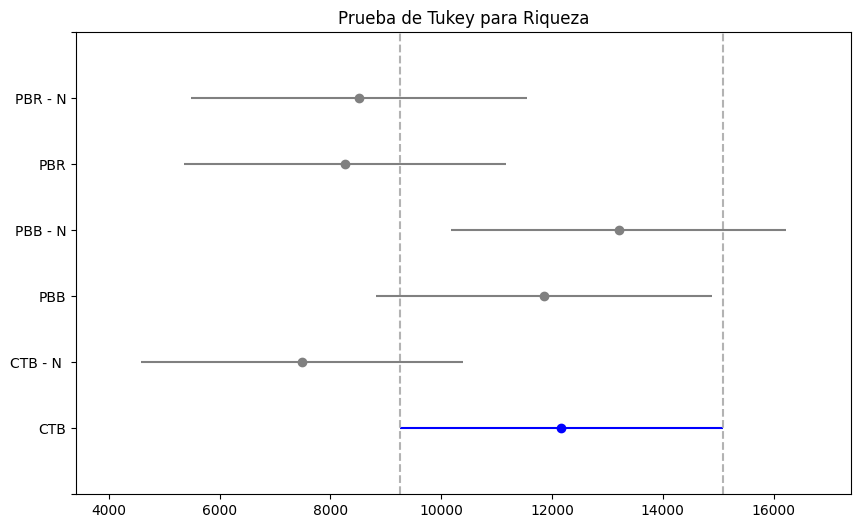

In [34]:
#Grafica de la prueba de Tukey resaltando la clave CTB

tukey.plot_simultaneous(comparison_name='CTB')
plt.title('Prueba de Tukey para Riqueza')
plt.show()

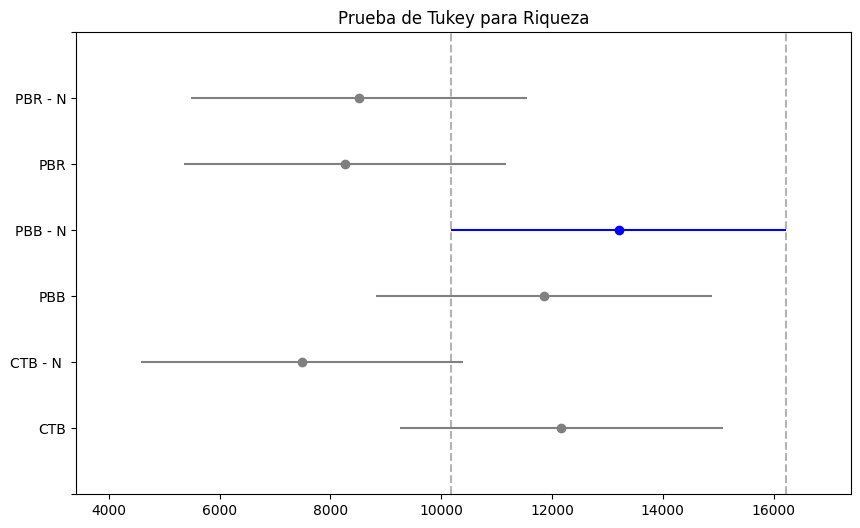

In [30]:
#Grafica de la prueba de Tukey resaltando PBB-N
tukey.plot_simultaneous(comparison_name="PBB - N")
plt.title('Prueba de Tukey para Riqueza')
plt.show()

Para visualiar mejor todos estos gráficos, podemos juntarlos en uno

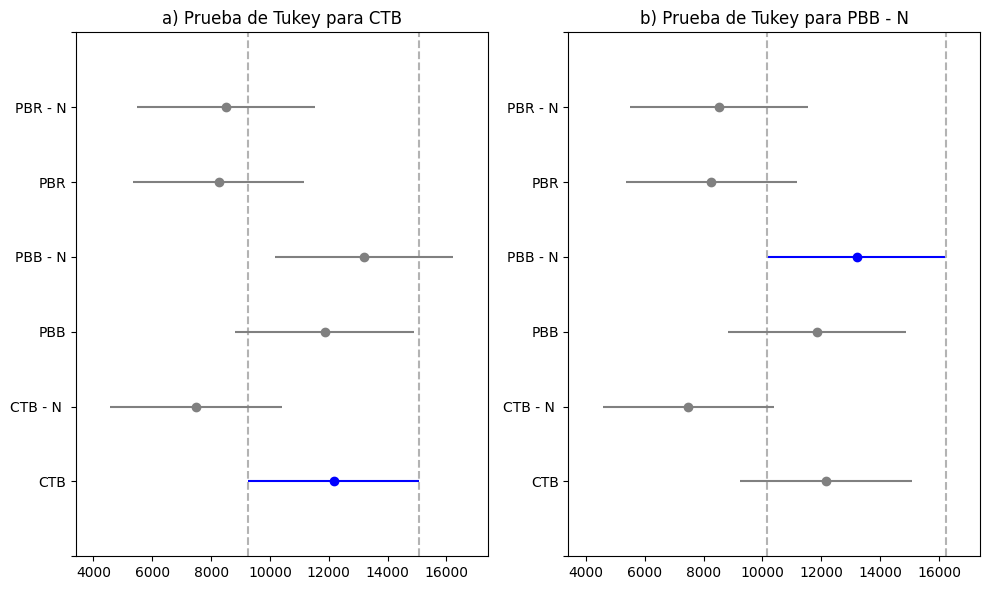

In [35]:
#Para hacer una figura con múltiples figuras:
# Crear una figura con 1 fila y 2 columnas para los subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

#Colocamos los dos gráficos
# Gráfico 1: Comparación con 'CTB'
tukey.plot_simultaneous(comparison_name='CTB', ax=axes[0])  # Especificamos que es el primer subplot
axes[0].set_title('a) Prueba de Tukey para CTB')

# Gráfico 2: Comparación con 'PBB - N'
tukey.plot_simultaneous(comparison_name='PBB - N', ax=axes[1])  # Especificamos que es el segundo subplot
axes[1].set_title('b) Prueba de Tukey para PBB - N')

# Ajustar diseño. plt.tight_layout ajusta automáticamente los márgenes y el espacio entre los subgráficos dentro de una figura para evitar que los elementos se sobrepongan
plt.tight_layout()
plt.show()

Vemos que, a pesar de que el análisis de ANOVA señalaba que el factor de Clave tenía efecto en la Riqueza y provocaba diferencias significativas, el análisis de Tukey muestra que estas supuestas diferencias significativas no existen. También debe ser por eso que el valor de F es bajo.

Ahora analizaremos lo mismo pero para el conjunto Clave:Tratamiento que igual parece mostrar que hay diferencias significativas.

Para esto, primero creamos la columna que tenga este conjunto Clave:Tratamiento y luego hacemos el análisis.

In [36]:
# Creamos una columna llamada Interaccion_clave_tratamiento
datos['Interaccion_clave_tratamiento'] = datos['Clave'] + '-' + datos['Tratamiento']
datos.head()


,Clave,Tratamiento,Secuencias,OTUs,Riqueza,Interaccion_clave_tratamiento
0,CTB,Suelo sin plantas de trigo,3463,523,14831.7,CTB-Suelo sin plantas de trigo
1,CTB,Suelo sin plantas de trigo,3454,567,26282.0,CTB-Suelo sin plantas de trigo
2,CTB,Suelo sin plantas de trigo,4569,550,16540.7,CTB-Suelo sin plantas de trigo
3,CTB,Suelo sin plantas de trigo,14720,559,13691.1,CTB-Suelo sin plantas de trigo
4,CTB,Suelo sin plantas de trigo,9894,538,7834.0,CTB-Suelo sin plantas de trigo


In [37]:
# Realizar la prueba post-hoc para la interacción
tukey_interaccion = pairwise_tukeyhsd(endog=datos['Riqueza'],  # Variable dependiente
                                      groups=datos['Interaccion_clave_tratamiento'],  # Interacción de conjunto Clave:Tratamiento
                                      alpha=0.05)  # Especificamos el nivel de significancia
print(tukey_interaccion)

                                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                                   
               group1                              group2                 meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------------------------------------------------------
CTB - N -Suelo con plantas de trigo CTB - N -Suelo sin plantas de trigo     79.4976    1.0  -9048.9778  9207.9731  False
CTB - N -Suelo con plantas de trigo      CTB-Suelo con plantas de trigo     3143.55 0.9923  -6329.5167 12616.6167  False
CTB - N -Suelo con plantas de trigo      CTB-Suelo sin plantas de trigo    6078.469 0.5147  -3050.0064 15206.9445  False
CTB - N -Suelo con plantas de trigo  PBB - N-Suelo con plantas de trigo   8740.5667 0.0976      -732.5 18213.6334  False
CTB - N -Suelo con plantas de trigo  PBB - N-Suelo sin plantas de trigo   2775.1167 0.9973    -6697.95 12248.1834  False
CTB - N -Suelo con plantas de tr

Ya incluso sin gráfico se puede ver que no hay diferencias significativas porque todos los valores de p > 0.05 y todas las casillas de la columna reject dicen **False**